## Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the data
df = pd.read_csv('zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df.shape

(14723, 272)

## Step 1(i) : Filter specific Zip codes according to their Sizerank


#### "SizeRank" is a value given to every zipcode based on the Urbanization. "More Urbanization = Higher SizeRank"

In [5]:
#filter zipcodes based of sizeRank and keep the top 15%.
#Find the Cutoff value for Sizerank

df['SizeRank'].quantile(0.15)

2209.2999999999997

In [6]:
#apply the cutoff value to filter zipcodes and keep  2209 only

Filtered_df = df[df['SizeRank']<2209]
Filtered_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [7]:
Filtered_df.shape

(2208, 272)

In [8]:
#drop extra FEATURES  that we think are not helpful

filtered_zipcopes = Filtered_df.drop(['RegionID','City','State','Metro','CountyName','SizeRank'],axis =1)
filtered_zipcopes.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [9]:
#add a column which shows MEDIAN house price for last two years in that specific zipcode

filtered_zipcopes['Average_Price_Last_2_Years ']= filtered_zipcopes.iloc[:,-24:].median(skipna=True, axis=1)
filtered_zipcopes.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Average_Price_Last_2_Years
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,997850.0
1,75070,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,305300.0
2,77494,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,322650.0
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1284250.0
4,79936,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,118300.0


In [10]:
# check the Overall median house price for  our zipcodes

filtered_zipcopes['Average_Price_Last_2_Years '].median()

242100.0

### " We Prefer zipcodes where average house Price for last 2 years  fall between 40th percentile and 60th percentile. We select values that are closer to our mean and fall inside a Normal distribution. This helps avoid outliers and events that are less common" 

In [11]:
#Calculate 60th percentile

q_60 = filtered_zipcopes['Average_Price_Last_2_Years '].quantile(0.60)
q_60

284720.00000000006

In [12]:
#Calculate 40th percentile

q_40 = filtered_zipcopes['Average_Price_Last_2_Years '].quantile(0.40)
q_40

206430.0

In [13]:
#apply the cutoff Percentile values to our dataset 

Prefferd_zip = filtered_zipcopes[(filtered_zipcopes['Average_Price_Last_2_Years ']<q_60) & 
                                 (filtered_zipcopes['Average_Price_Last_2_Years ']>q_40)]

In [14]:
Prefferd_zip.shape

(442, 267)

#### " We would futhur filter our data based on the 'Risk Management" & 'Return on Investment (Roi)"  for every zip code"

## Note:  

###     ' I have Filtered my dataset to Past 9 years to be more Realistic about our Predictions Because of the Housing Market Crash in 2008'.

#### For risk management, we would count COEFFICIENT of Variance based on  returns Since 2009 for each zip code 

In [15]:
#Add a column to Show the (%) historical returns  since 2009 for our Zipcodes

Prefferd_zip['ROI'] = (Prefferd_zip['2018-04']/Prefferd_zip['2009-04'])-1

In [16]:
Prefferd_zip.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Average_Price_Last_2_Years,ROI
11,32162,101000.0,100700.0,100400.0,100100.0,99800.0,99500.0,99200.0,98900.0,98600.0,...,249900,248700,247500,247100,246800,247500,249800,251800,248000.0,0.218780
17,37211,97900.0,98000.0,98200.0,98400.0,98700.0,99000.0,99400.0,99900.0,100500.0,...,246700,248800,251100,253900,256500,259000,262100,264200,239000.0,0.732459
18,78660,138900.0,138600.0,138400.0,138500.0,138700.0,139000.0,139300.0,139600.0,139900.0,...,236600,237400,238500,239400,240000,241000,242200,242800,231850.0,0.414918
22,77573,141400.0,141000.0,140600.0,140500.0,140400.0,140500.0,140700.0,141000.0,141300.0,...,252300,252400,252300,253100,254700,257100,259800,261400,246700.0,0.377965
23,77584,138500.0,138700.0,139200.0,139900.0,140700.0,141600.0,142500.0,143400.0,144100.0,...,250500,250700,251000,251400,251900,253200,255100,256500,246900.0,0.329016


In [17]:
Prefferd_zip['Std']=Prefferd_zip.loc[:,'2009-04':'2018-04'].std(skipna=True, axis=1)

In [18]:
#Add a column for Mean  montly return values

Prefferd_zip['Mean']=Prefferd_zip.loc[:,'2009-04':'2018-04'].mean(skipna=True, axis=1)
Prefferd_zip.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Average_Price_Last_2_Years,ROI,Std,Mean
11,32162,101000.0,100700.0,100400.0,100100.0,99800.0,99500.0,99200.0,98900.0,98600.0,...,247500,247100,246800,247500,249800,251800,248000.0,0.218780,22739.657430,222038.532110
17,37211,97900.0,98000.0,98200.0,98400.0,98700.0,99000.0,99400.0,99900.0,100500.0,...,251100,253900,256500,259000,262100,264200,239000.0,0.732459,38809.413103,174489.908257
18,78660,138900.0,138600.0,138400.0,138500.0,138700.0,139000.0,139300.0,139600.0,139900.0,...,238500,239400,240000,241000,242200,242800,231850.0,0.414918,24999.889364,188491.743119
22,77573,141400.0,141000.0,140600.0,140500.0,140400.0,140500.0,140700.0,141000.0,141300.0,...,252300,253100,254700,257100,259800,261400,246700.0,0.377965,26175.399700,207256.880734
23,77584,138500.0,138700.0,139200.0,139900.0,140700.0,141600.0,142500.0,143400.0,144100.0,...,251000,251400,251900,253200,255100,256500,246900.0,0.329016,24996.902866,208985.321101


In [19]:
#Finally we can Calculate the coefficient of variance (C.V)

Prefferd_zip['C.V']=Prefferd_zip['Std']/Prefferd_zip['Mean']

In [20]:
#Calculated values

Prefferd_zip[['RegionName','Mean','Std','ROI','C.V']].head()

,RegionName,Mean,Std,ROI,C.V
11,32162,222038.532110,22739.657430,0.218780,0.102413
17,37211,174489.908257,38809.413103,0.732459,0.222416
18,78660,188491.743119,24999.889364,0.414918,0.132631
22,77573,207256.880734,26175.399700,0.377965,0.126294
23,77584,208985.321101,24996.902866,0.329016,0.119611


###  For risk management we should pick zipcodes where 'C.V' is less than 60th percentile. Picking a C.V value close to Mean increases the probability of more steady returns on our investment and less Fluctuation.

In [21]:
#Calculate 60th percentile value for C.V

Prefferd_zip["C.V"].quantile(0.60)

0.16024004029984704

In [22]:
#filter zipcodes based on (C.V < 0.1602)

Best_zipcodes = Prefferd_zip[Prefferd_zip['C.V']<0.16024]

In [23]:
Best_zipcodes.head()


,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-12,2018-01,2018-02,2018-03,2018-04,Average_Price_Last_2_Years,ROI,Std,Mean,C.V
11,32162,101000.0,100700.0,100400.0,100100.0,99800.0,99500.0,99200.0,98900.0,98600.0,...,247100,246800,247500,249800,251800,248000.0,0.218780,22739.657430,222038.532110,0.102413
18,78660,138900.0,138600.0,138400.0,138500.0,138700.0,139000.0,139300.0,139600.0,139900.0,...,239400,240000,241000,242200,242800,231850.0,0.414918,24999.889364,188491.743119,0.132631
22,77573,141400.0,141000.0,140600.0,140500.0,140400.0,140500.0,140700.0,141000.0,141300.0,...,253100,254700,257100,259800,261400,246700.0,0.377965,26175.399700,207256.880734,0.126294
23,77584,138500.0,138700.0,139200.0,139900.0,140700.0,141600.0,142500.0,143400.0,144100.0,...,251400,251900,253200,255100,256500,246900.0,0.329016,24996.902866,208985.321101,0.119611
38,77429,149600.0,148800.0,148100.0,147600.0,147100.0,146700.0,146400.0,146100.0,145700.0,...,241300,241700,242200,243200,243800,236550.0,0.364298,25837.182871,197312.844037,0.130945


## Filter the TOP 5 Zipcodes Based on highest ROI

In [24]:
TOP_5_Zipcodes = Best_zipcodes.sort_values('ROI',ascending=False)[:5]

## Top 5 ZIPCODES

In [25]:
TOP_5_Zipcodes[['RegionName','ROI','C.V']]

,RegionName,ROI,C.V
1211,76039,0.566102,0.149971
1661,76021,0.539607,0.153670
1626,80909,0.520460,0.147143
594,78748,0.512064,0.159275
153,76063,0.508732,0.154382


In [26]:
#we have our dataframe with top 5 Zipcodes

TOP_5_Zipcodes.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-12,2018-01,2018-02,2018-03,2018-04,Average_Price_Last_2_Years,ROI,Std,Mean,C.V
1211,76039,119500.0,119600.0,119600.0,119700.0,119800.0,120000.0,120100.0,120300.0,120400.0,...,222600,226100,228400,229800,231000,208650.0,0.566102,25155.906118,167738.532110,0.149971
1661,76021,132000.0,131600.0,131300.0,131000.0,130800.0,130600.0,130500.0,130400.0,130300.0,...,253600,254500,255900,257300,258500,243850.0,0.539607,29231.577399,190222.935780,0.153670
1626,80909,102200.0,102800.0,103400.0,104000.0,104700.0,105400.0,106100.0,106800.0,107500.0,...,226400,229300,232300,235700,237800,207950.0,0.520460,24840.179943,168816.513761,0.147143
594,78748,199500.0,198800.0,197900.0,196700.0,195100.0,193000.0,190300.0,187200.0,183900.0,...,276700,277800,279000,280800,282000,266550.0,0.512064,34056.016397,213818.348624,0.159275
153,76063,148100.0,148000.0,147800.0,147700.0,147500.0,147400.0,147300.0,147200.0,147200.0,...,261100,262200,264100,266500,267800,251850.0,0.508732,30877.081232,200004.587156,0.154382


## STEP 2 : Data Preprocessing

In [27]:
#Drop extra columns and convert data to time series format

TS_format = TOP_5_Zipcodes.drop(['Average_Price_Last_2_Years ', 'ROI', 'Std', 'Mean', 'C.V'],axis =1)
TS_format.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1211,76039,119500.0,119600.0,119600.0,119700.0,119800.0,120000.0,120100.0,120300.0,120400.0,...,213700,215600,215900,216700,218900,222600,226100,228400,229800,231000
1661,76021,132000.0,131600.0,131300.0,131000.0,130800.0,130600.0,130500.0,130400.0,130300.0,...,248200,250100,251200,252300,252900,253600,254500,255900,257300,258500
1626,80909,102200.0,102800.0,103400.0,104000.0,104700.0,105400.0,106100.0,106800.0,107500.0,...,214200,216800,219300,221500,223800,226400,229300,232300,235700,237800
594,78748,199500.0,198800.0,197900.0,196700.0,195100.0,193000.0,190300.0,187200.0,183900.0,...,268400,268700,270100,272600,274900,276700,277800,279000,280800,282000
153,76063,148100.0,148000.0,147800.0,147700.0,147500.0,147400.0,147300.0,147200.0,147200.0,...,257200,258700,259000,259600,260200,261100,262200,264100,266500,267800


In [28]:
#Filter data from 2009 to 2018

TS_data_after_2009 = TS_format.loc[:,'2009-01':'2018-04']
TS_data_after_2009.dropna().head()

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1211,147300.0,147600.0,147700.0,147500.0,147300.0,147200.0,147900.0,148900.0,149800.0,150400.0,...,213700,215600,215900,216700,218900,222600,226100,228400,229800,231000
1661,167300.0,167700.0,167900.0,167900.0,167800.0,167600.0,167800.0,168400.0,169200.0,169700.0,...,248200,250100,251200,252300,252900,253600,254500,255900,257300,258500
1626,156600.0,156600.0,156500.0,156400.0,156000.0,155500.0,155500.0,156000.0,156600.0,156900.0,...,214200,216800,219300,221500,223800,226400,229300,232300,235700,237800
594,186600.0,186800.0,186700.0,186500.0,186200.0,186100.0,186000.0,186000.0,186100.0,186200.0,...,268400,268700,270100,272600,274900,276700,277800,279000,280800,282000
153,178900.0,178600.0,178200.0,177500.0,176700.0,176100.0,176000.0,176200.0,176700.0,177200.0,...,257200,258700,259000,259600,260200,261100,262200,264100,266500,267800


In [29]:
#add zipcodes column back to the dataset

TS_data_after_2009['Zipcode'] = TS_format['RegionName']

In [30]:
TS_data_after_2009.head()

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Zipcode
1211,147300.0,147600.0,147700.0,147500.0,147300.0,147200.0,147900.0,148900.0,149800.0,150400.0,...,215600,215900,216700,218900,222600,226100,228400,229800,231000,76039
1661,167300.0,167700.0,167900.0,167900.0,167800.0,167600.0,167800.0,168400.0,169200.0,169700.0,...,250100,251200,252300,252900,253600,254500,255900,257300,258500,76021
1626,156600.0,156600.0,156500.0,156400.0,156000.0,155500.0,155500.0,156000.0,156600.0,156900.0,...,216800,219300,221500,223800,226400,229300,232300,235700,237800,80909
594,186600.0,186800.0,186700.0,186500.0,186200.0,186100.0,186000.0,186000.0,186100.0,186200.0,...,268700,270100,272600,274900,276700,277800,279000,280800,282000,78748
153,178900.0,178600.0,178200.0,177500.0,176700.0,176100.0,176000.0,176200.0,176700.0,177200.0,...,258700,259000,259600,260200,261100,262200,264100,266500,267800,76063


## Step 3: Reshape from Wide to Long Format

In [31]:
df_melted = pd.melt(TS_data_after_2009, id_vars=['Zipcode'],var_name='Date',value_name = 'Price')
df_melted.head()

,Zipcode,Date,Price
0,76039,2009-01,147300.0
1,76021,2009-01,167300.0
2,80909,2009-01,156600.0
3,78748,2009-01,186600.0
4,76063,2009-01,178900.0


In [32]:
#convert date to datetime format

df_melted['Date'] = pd.to_datetime(df_melted['Date'])

In [33]:
#set date as  index

df_melted.set_index('Date',inplace=True)

In [34]:
#i haven't been able to convert the (Time Freq) from None to MS

#df_melted = df_melted.asfreq('MS')

In [35]:
df_melted.head()

,Zipcode,Price
Date,,
2009-01-01,76039,147300.0
2009-01-01,76021,167300.0
2009-01-01,80909,156600.0
2009-01-01,78748,186600.0
2009-01-01,76063,178900.0


## Step 4 : EDA and data Visualizations

###  Visualize the historical returns on our zipcodes

Zipcode
76021    AxesSubplot(0.125,0.125;0.775x0.755)
76039    AxesSubplot(0.125,0.125;0.775x0.755)
76063    AxesSubplot(0.125,0.125;0.775x0.755)
78748    AxesSubplot(0.125,0.125;0.775x0.755)
80909    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Price, dtype: object

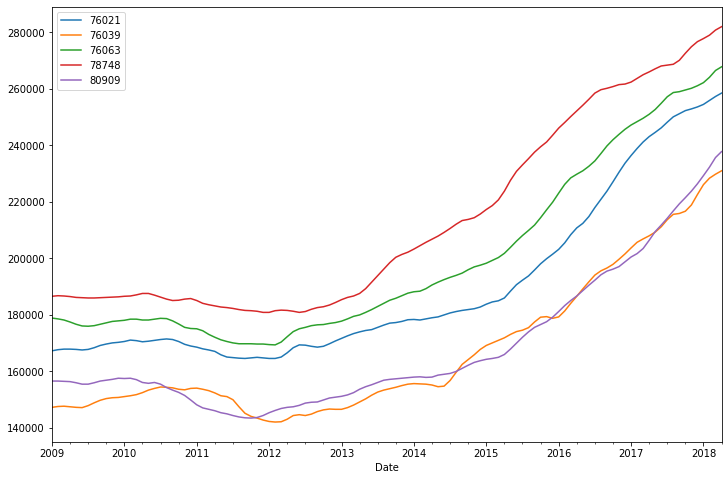

In [36]:
df_melted.groupby('Zipcode')['Price'].plot(legend= True,figsize=(12,8))

## Step 5: ARIMA Modeling

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
from statsmodels.tsa.arima_model import ARMA, ARIMA,ARMAResults,ARIMAResults

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [40]:
from pmdarima import auto_arima

In [41]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [42]:
#run the Dickey_Fuller test to check if data is stationary

adf_test(df_melted['Price'],'Price')

Augmented Dickey-Fuller Test: Price
ADF test statistic       -0.479080
p-value                   0.896035
# lags used              19.000000
# observations          540.000000
critical value (1%)      -3.442518
critical value (5%)      -2.866907
critical value (10%)     -2.569629
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [43]:
#Data is non stationary we will use Grid search(auto-arima) to find what kind of model we should use

auto_arima(df_melted['Price'],seasonal=True).summary()

C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimizat

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  560
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -6160.609
Date:                Thu, 21 Nov 2019   AIC                          12335.218
Time:                        16:50:23   BIC                          12365.501
Sample:                             0   HQIC                         12347.043
                                - 560                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1317.2609    494.819      2.662      0.008     347.433    2287.089
ar.L1         -1.5838      0.041    -38.275      0.000      -1.665      -1.503
ar.L2         -0.7632      0.037    -20.420      0.000      -0.836      -0.690
ma.L1          1.0904      0.062     17.459      0.000       0.968       1.213
ma.L2         -0.8045      0.077    -10.460      0.000      -0.955      -0.654
ma.L3         -0.9002      0.063    -14.226      0.000      -1.024      -0.776
sigma2      2.507e+08      0.007   3.71e+10      0.000    2.51e+08    2.51e+08
===================================================================================
Ljung-Box (Q):                     3783.30   Jarque-Bera (JB):               231.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             1.43
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.1e+25. Standard errors may be unstable.
"""

In [44]:
len(df_melted)

560

###  Split data into train & test sets

In [45]:
# Set one year for testing

train = df_melted.iloc[:520]
test = df_melted.iloc[520:]

###  Fit our Model:	SARIMAX

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
model = SARIMAX(train['Price'],order=(2,1,3))
results = model.fit()
results.summary()

C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Price   No. Observations:                  520
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -5779.657
Date:                Thu, 21 Nov 2019   AIC                          11571.314
Time:                        16:50:24   BIC                          11596.825
Sample:                             0   HQIC                         11581.309
                                - 520                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5157      0.077    -19.597      0.000      -1.667      -1.364
ar.L2         -0.8894      0.050    -17.829      0.000      -0.987      -0.792
ma.L1          0.9203      0.114      8.065      0.000       0.697       1.144
ma.L2         -0.7637      0.119     -6.435      0.000      -0.996      -0.531
ma.L3         -0.8640      0.108     -7.999      0.000      -1.076      -0.652
sigma2      5.264e+08   1.15e-10   4.59e+18      0.000    5.26e+08    5.26e+08
===================================================================================
Ljung-Box (Q):                     4309.59   Jarque-Bera (JB):               355.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             1.13
Prob(H) (two-sided):                  0.58   Kurtosis:                         6.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.25e+34. Standard errors may be unstable.
"""

In [48]:
# Obtain predicted values

start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end,) #dynamic=False).rename('SARIMA(2,1,3) Predictions')

predictions.head()

C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


520    217551.422330
521    262890.046096
522    223459.113933
523    242900.169639
524    248502.712422
dtype: float64

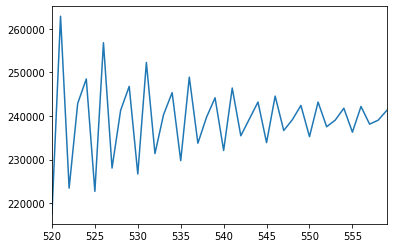

In [49]:
#Plot predictions for our test data

predictions.plot()

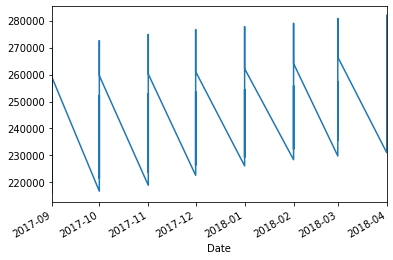

In [50]:
# Plot  Actual Values from our Test dataset

test['Price'].plot()

In [51]:
df_melted.tail()


,Zipcode,Price
Date,,
2018-04-01,76039,231000.0
2018-04-01,76021,258500.0
2018-04-01,80909,237800.0
2018-04-01,78748,282000.0
2018-04-01,76063,267800.0


In [62]:
from sklearn.metrics import mean_absolute_error


absolute_error  = mean_absolute_error(test['Price'],predictions)
print('Absolute Error',absolute_error)


from statsmodels.tools.eval_measures import rmse

error = rmse(test['Price'], predictions)
print(f'SARIMA(2,1,3) RMSE Error: {error:}')

Absolute Error 14866.178183524147
SARIMA(2,1,3) RMSE Error: 19498.815842806023


###  OUTCOME :    Our model is predicting at an average  of (15k Dollars) above or below the actual price.

## Retrain the model on entire data to forecast  2 years into future

In [53]:
model = SARIMAX(df_melted['Price'],order=(2,1,3))
results = model.fit()
forecast = results.predict(len(df_melted),len(df_melted)+24,typ='levels')

C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0, 0.5, 'Price')

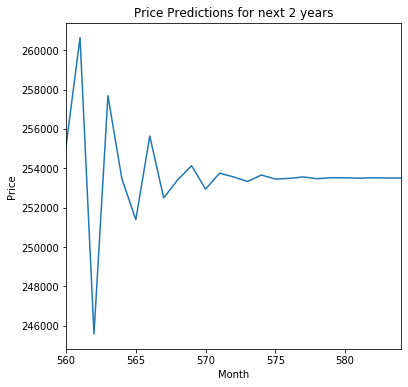

In [54]:
# Plot predictions against known values

title = 'Price Predictions for next 2 years'
##xlabel='Year'

#ax = df_melted['Price'].plot(legend=True,figsize=(12,6))#,title=title)
forecast.plot(title=title,figsize=(6,6))
plt.xlabel('Month')
plt.ylabel('Price')
#ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel, ylabel=ylabel);

In [55]:
# I could not run the code above to plot my predictions against Real values,
#because my Time freq is still None, i could't convert it to Monthly format.

In [56]:
forecast.head(12)

560    255131.495746
561    260642.757904
562    245586.090499
563    257681.657180
564    253468.410620
565    251388.801913
566    255635.070907
567    252495.889838
568    253414.047673
569    254127.832448
570    252943.746154
571    253749.798240
dtype: float64